# Tutorial: Lasso Regression (L1 Regularization)

Setelah mempelajari Ridge Regression, kita akan berkenalan dengan "saudaranya" yang memiliki satu kemampuan super yang unik: **Lasso Regression**.

Seperti Ridge, Lasso juga merupakan teknik regularisasi yang bertujuan untuk mencegah overfitting dengan menambahkan penalti pada koefisien. Namun, cara Lasso memberikan penalti sedikit berbeda, dan perbedaan ini menghasilkan properti yang sangat kuat: **kemampuan untuk melakukan seleksi fitur (feature selection) secara otomatis.**


---
### 1. Tujuan Pembelajaran

Di akhir notebook ini, Anda akan dapat:

* Menjelaskan intuisi di balik Lasso Regression dan L1 Regularization.
* Mengimplementasikan `Lasso` dari Scikit-learn dalam sebuah `Pipeline`.
* Memahami bagaimana Lasso dapat membuat koefisien menjadi persis nol.
* Menginterpretasikan hasil Lasso sebagai bentuk seleksi fitur otomatis.

---
### 2. Setup: Menggunakan Skenario Overfitting yang Sama

Untuk perbandingan yang adil, kita akan menggunakan data dan model polinomial derajat 10 yang sama persis dengan yang kita gunakan di tutorial Ridge.

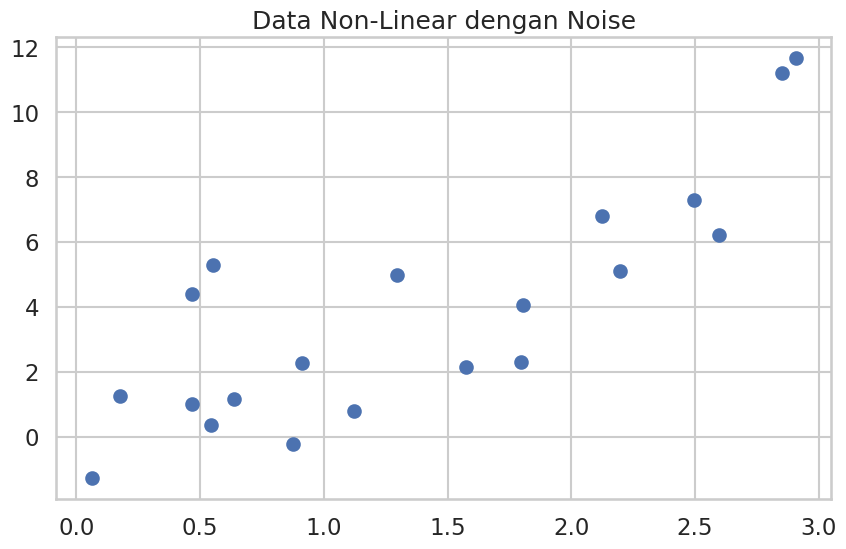

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Atur tema visual
sns.set_theme(style="whitegrid", context="talk")

# Data non-linear
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + X**2 + 2 * np.random.randn(m, 1)

# Plot data
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.title("Data Non-Linear dengan Noise")
plt.show()

---
### 3. Intuisi di Balik Lasso Regression

Perbedaan utama antara Ridge dan Lasso terletak pada cara mereka menghitung penalti.

* **Ridge (L2 Penalti):** `Minimalkan Error + alpha * Σ(koefisien)²`
* **Lasso (L1 Penalti):** `Minimalkan Error + alpha * Σ|koefisien|`

Perubahan dari **kuadrat koefisien (L2 norm)** menjadi **nilai absolut koefisien (L1 norm)** mungkin terlihat kecil, tetapi memiliki dampak matematis yang besar.

Penalti L1 memiliki kecenderungan untuk **mendorong koefisien dari fitur yang tidak penting menjadi persis nol**. Sementara Ridge hanya akan mengecilkan koefisien mendekati nol, Lasso dapat menghilangkannya sepenuhnya.

**Analogi:** Bayangkan Anda membereskan lemari.
* **Ridge:** Akan melipat semua baju (bahkan yang tidak pernah Anda pakai) menjadi sangat kecil untuk menghemat ruang.
* **Lasso:** Akan melihat baju yang tidak pernah Anda pakai dan **membuangnya** dari lemari.


---
### 4. Implementasi dengan `Lasso` dari Scikit-learn

Implementasinya sangat mirip dengan Ridge. Kita hanya perlu mengganti `Ridge` dengan `Lasso` di dalam pipeline kita. `alpha` juga memiliki peran yang sama dalam mengontrol kekuatan regularisasi.


In [9]:
lasso_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lasso_reg', Lasso(alpha=0.1, max_iter=10000))
])

lasso_model.fit(X, y)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('poly_features', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"degree degree: int or tuple (min_degree, max_degree), default=2If a single int is given, it specifies the maximal degree of thepolynomial features. If a tuple `(min_degree, max_degree)` is passed,then `min_degree` is the minimum and `max_degree` is the maximumpolynomial degree of the generated features. Note that `min_degree=0`and `min_degree=1` are equivalent as outputting the degree zero term isdetermined by `include_bias`.",10
,"interaction_only interaction_only: bool, default=FalseIf `True`, only interaction features are produced: features that areproducts of at most `degree` *distinct* input features, i.e. terms withpower of 2 or higher of the same input feature are excluded:- included: `x[0]`, `x[1]`, `x[0] * x[1]`, etc.- excluded: `x[0] ** 2`, `x[0] ** 2 * x[1]`, etc.",False
,"include_bias include_bias: bool, default=TrueIf `True` (default), then include a bias column, the feature in whichall polynomial powers are zero (i.e. a column of ones - acts as anintercept term in a linear model).",False
,"order order: {'C', 'F'}, default='C'Order of output array in the dense case. `'F'` order is faster tocompute, but may slow down subsequent estimators... versionadded:: 0.21",'C'
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True


### 5. Membandingkan Hasilnya Secara Visual

Mari kita lihat bagaimana prediksi dari model Lasso dibandingkan dengan data asli.


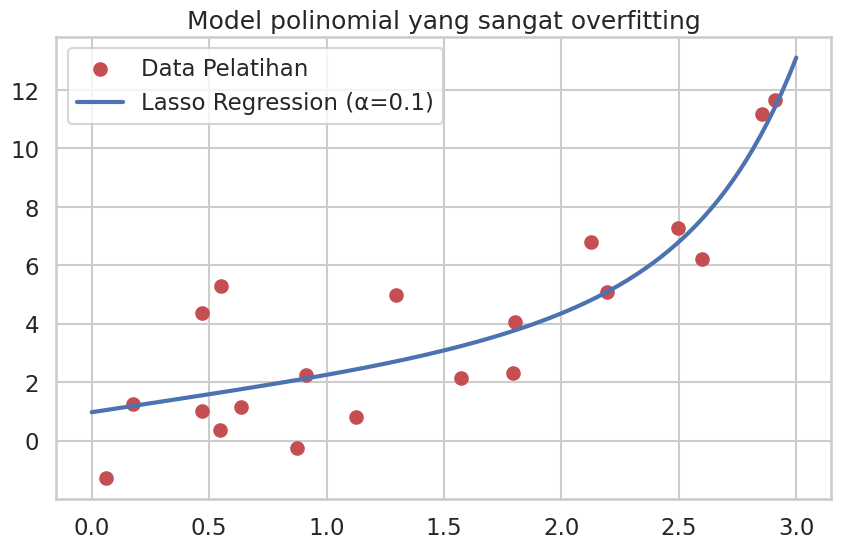

In [10]:
# fungsi untuk memvisualisasikan prediksi
def plot_model_predictions(model, label):
    X_new = np.linspace(0, 3, 100).reshape(100, 1)
    y_new_pred = model.predict(X_new)
    plt.plot(X_new, y_new_pred, label=label, linewidth=3)

# visualisasi model yang overfitting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='r', label="Data Pelatihan")
plot_model_predictions(lasso_model, "Lasso Regression (α=0.1)")
plt.title('Model polinomial yang sangat overfitting')
plt.legend()
plt.show()

lassso_coefficients = lasso_model.named_steps['lasso_reg'].coef_

Sama seperti Ridge, Lasso juga berhasil menghasilkan kurva yang jauh lebih mulus dan masuk akal dibandingkan model yang overfitting.


---
### 6. Properti Kunci: Seleksi Fitur Otomatis

Inilah keajaiban sebenarnya dari Lasso. Mari kita periksa koefisien yang telah dipelajari oleh model kita. Ingat, kita memberinya 10 fitur polinomial (x¹, x², ..., x¹⁰).


In [11]:
zero_coef = np.sum(lasso_model.named_steps['lasso_reg'].coef_ == 0)
non_zero_coef = np.sum(lasso_model.named_steps['lasso_reg'].coef_ != 0)

print(f'jumlah foefisien yang dijadikan nol oleh Lasso: {zero_coef}')
print(f'jumlah foefisien yang tidak dijadikan nol oleh Lasso: {non_zero_coef}')

jumlah foefisien yang dijadikan nol oleh Lasso: 7
jumlah foefisien yang tidak dijadikan nol oleh Lasso: 3


**Analisis Koefisien:**

Perhatikan! Sebagian besar koefisien adalah **nol**! Mari kita hitung.


In [12]:
print(f'semua koefisien Lasso: {lassso_coefficients}')

semua koefisien Lasso: [1.10336398 0.         0.         1.19524931 0.         0.
 0.         0.         0.         0.83215914]


**Ini sangat kuat.** Dari 10 fitur yang kita berikan, Lasso secara otomatis memutuskan bahwa sebagian besar dari mereka (terutama fitur dengan pangkat tinggi) tidak berguna dan pada dasarnya **menghapusnya dari model** dengan membuat koefisiennya menjadi nol.

Ia telah menyimpulkan bahwa hanya beberapa fitur pertama yang benar-benar penting untuk membuat prediksi. Ini adalah bentuk **seleksi fitur otomatis**.

### Kesimpulan

* **Lasso Regression (L1)** adalah teknik regularisasi yang tidak hanya mencegah overfitting tetapi juga dapat melakukan **seleksi fitur**.
* Cara kerjanya adalah dengan menambahkan penalti pada **nilai absolut besarnya koefisien (L1 norm)**.
* Properti ini membuatnya sangat berguna jika Anda memiliki dataset dengan **banyak sekali fitur** dan Anda curiga bahwa hanya sebagian kecil dari fitur tersebut yang benar-benar penting.

**Selanjutnya:**
Kita telah melihat Ridge dan Lasso. Di subchapter berikutnya, kita akan membandingkan keduanya secara langsung dan membahas kapan harus menggunakan masing-masing.
